In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import numpy as np
import community as community_louvain
from networkx.algorithms import betweenness_centrality
from networkx.algorithms import closeness_centrality
from networkx.algorithms import pagerank
# from networkx.algorithms.community.centrality import girvan_newman



In [2]:
df = pd.read_csv('data/original/netflix_titles.csv').dropna().head(2500)



In [41]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [42]:
df[['director', 'rating']]

,director,rating
7,Haile Gerima,TV-MA
8,Andy Devonshire,TV-14
9,Theodore Melfi,PG-13
12,Christian Schwochow,TV-MA
24,S. Shankar,TV-14
...,...,...
4600,"Mastan Alibhai Burmawalla, Abbas Alibhai Burma...",TV-14
4601,"Abbas Alibhai Burmawalla, Mastan Alibhai Burma...",TV-14
4602,Vipin Parashar,TV-PG
4603,Vikram Pradhan,TV-14


In [3]:
ls = []
for i, r in df.iterrows():
    d = r['director'].split(', ')
    for n in d:
        ls.append({'director': n, 'rating': r['rating']})
data = pd.DataFrame(ls).drop_duplicates()


In [4]:
data

,director,rating
0,Haile Gerima,TV-MA
1,Andy Devonshire,TV-14
2,Theodore Melfi,PG-13
3,Christian Schwochow,TV-MA
4,S. Shankar,TV-14
...,...,...
2749,Akshay Akkineni,TV-14
2750,Nidhi Sharma,TV-PG
2755,Vipin Parashar,TV-PG
2756,Vikram Pradhan,TV-14


In [4]:
directors = set(data['director'])
ratings = set(data['rating'])

In [6]:
print('Number of directors:', len(directors))
print('Number of ratings:', len(ratings))
print('Number of edges:', len(data))

Number of directors: 2208
Number of ratings: 10
Number of edges: 2411


<h1>Đồ thị 2 phía</h1>

In [5]:
B = nx.Graph()

In [6]:
B.add_nodes_from(directors, bipartite = 1)
B.add_nodes_from(ratings, bipartite = 0)
for i, r in data.iterrows():
    B.add_edge(r['director'], r['rating'], weight = 1)

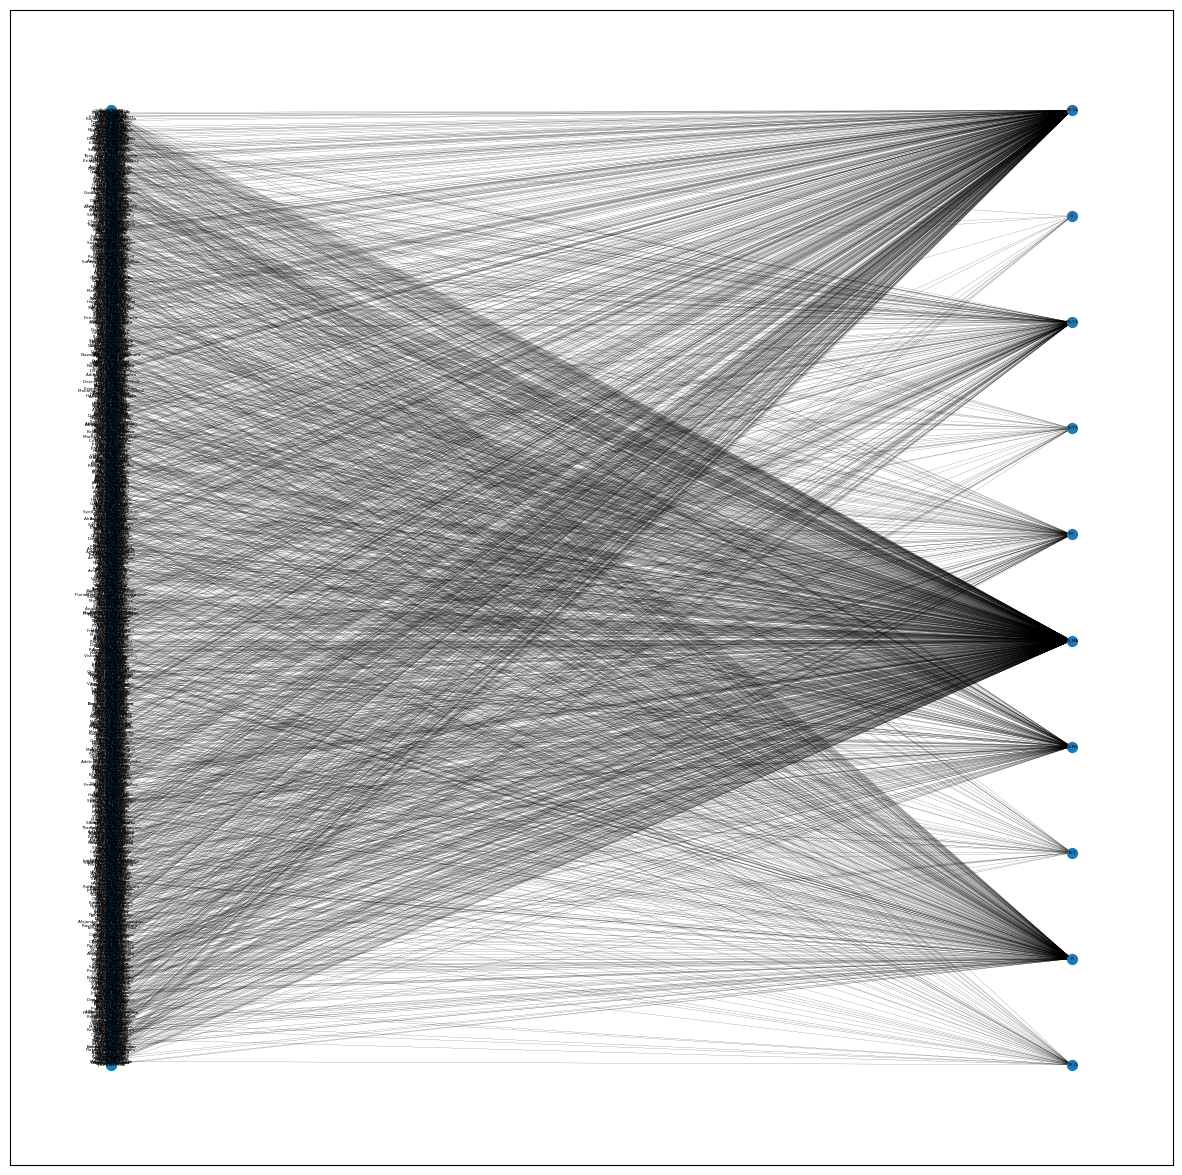

In [49]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(B, pos=nx.drawing.layout.bipartite_layout(
    B, directors), font_size=3, width=0.1, with_labels=True, node_size=50)


<h1>Đồ thị 1 phía</h1>

In [7]:
G = bipartite.weighted_projected_graph(B, directors)

In [51]:
# labels = nx.get_edge_attributes(G, 'weight')
# ll = []
# for key, value in labels.items():
#     ll.append({'source':key[0], 'targer':key[1], 'weight': value})
# pd.DataFrame(ll).to_csv('data/reprocessed/one_sited.csv', index=False)

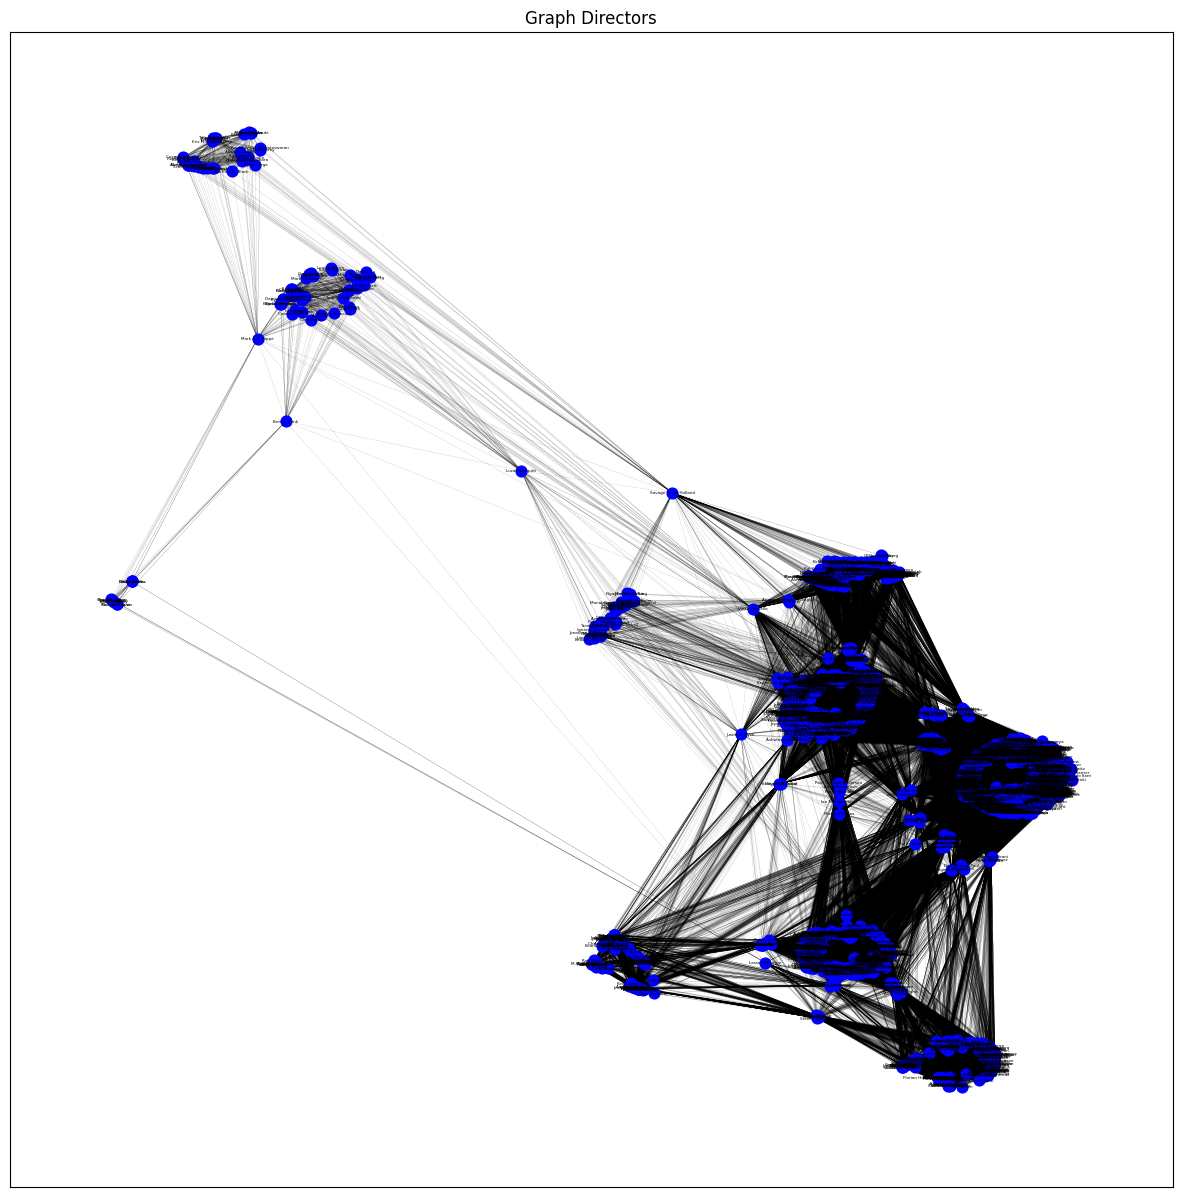

In [52]:
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=60, node_color='blue')
nx.draw_networkx_edges(G, pos=pos, width=0.05)
nx.draw_networkx_labels(G, pos=pos, font_size=3)
plt.title("Graph Directors")
plt.show()

<h1>Closeness Centrality</h1>

In [53]:
closeness_centrality = closeness_centrality(G)

In [55]:
# plt.figure(figsize = (15,15))
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos=pos, node_size=[ round(v*40) for v in closeness_centrality.values()], node_color=[ round(v*400) for v in closeness_centrality.values()])
# nx.draw_networkx_edges(G, pos=pos, width=0.05)
# plt.title("Graph Directors")
# plt.show()

In [56]:
top_closeness = sorted(closeness_centrality.items(),
                       key=lambda x: x[1], reverse=True)[0:19]
top_closeness_directors = [i[0] for i in top_closeness]
top_closeness


[('Ava DuVernay', 0.7953153153153153),
 ('Cathy Garcia-Molina', 0.777112676056338),
 ('Mae Czarina Cruz', 0.768186564566655),
 ('Johnnie To', 0.768186564566655),
 ('Yılmaz Erdoğan', 0.768186564566655),
 ('Hanung Bramantyo', 0.768186564566655),
 ('McG', 0.7665856200069469),
 ('Leslie Small', 0.7217135382603008),
 ('Ahmed Nader Galal', 0.7203002610966057),
 ('Raj Kumar Gupta', 0.7203002610966057),
 ('Sameh Abdulaziz', 0.7203002610966057),
 ('Kayode Kasum', 0.7203002610966057),
 ('Moses Inwang', 0.7203002610966057),
 ('Anurag Basu', 0.7203002610966057),
 ('Youssef Chahine', 0.7203002610966057),
 ('Prakash Jha', 0.7203002610966057),
 ('B. V. Nandini Reddy', 0.7203002610966057),
 ('Olivia M. Lamasan', 0.7203002610966057),
 ('Ribhu Dasgupta', 0.7203002610966057)]

<h1>Betweenness Centrality</h1>

In [58]:
betweenness_centrality = betweenness_centrality(G)

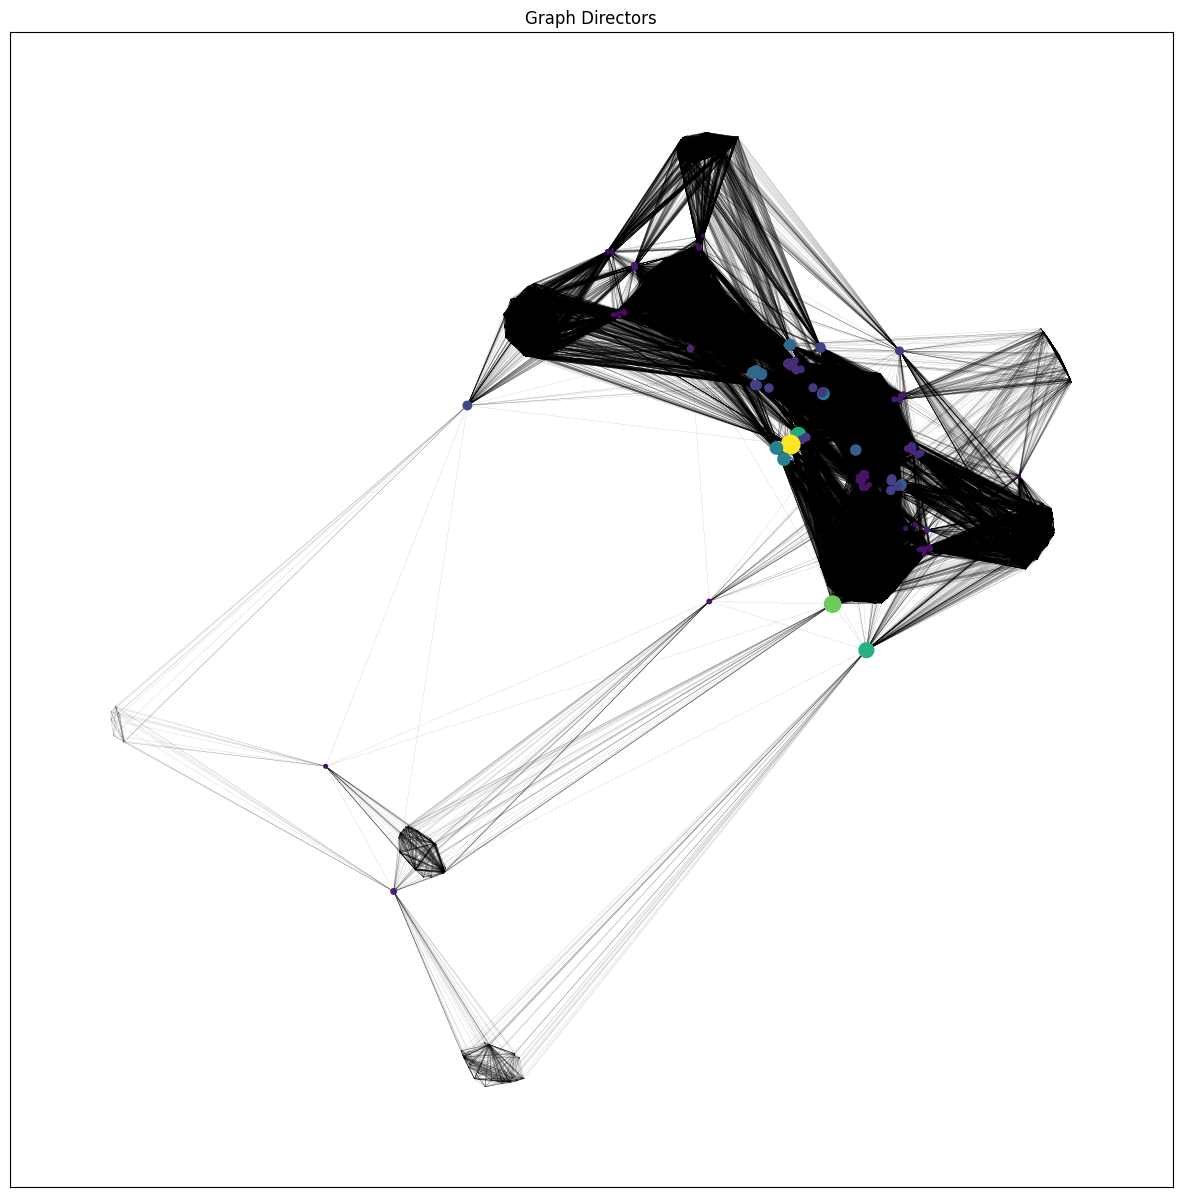

In [ ]:
# plt.figure(figsize = (15,15))
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos=pos, node_size=[ round(v*4000) for v in betweenness_centrality.values()], node_color=[ round(v*4000) for v in betweenness_centrality.values()])
# nx.draw_networkx_edges(G, pos=pos, width=0.05)
# plt.title("Graph Directors")
# plt.show()

In [ ]:
top_betweenness = sorted(betweenness_centrality.items(),
                         key=lambda x: x[1], reverse=True)[0:19]
top_betweenness_directors = [i[0] for i in top_betweenness]
top_betweenness


[('McG', 0.04456754764058055),
 ('Vince Marcello', 0.03438664113317349),
 ('Savage Steve Holland', 0.028353429013614005),
 ('Ava DuVernay', 0.026625209158010962),
 ('Ian MacNaughton', 0.019407350721755305),
 ('Michael Tiddes', 0.019407350721755305),
 ('Leslie Small', 0.017531625967583116),
 ('Martin Scorsese', 0.015016538186511889),
 ('Don Michael Paul', 0.014852298561907394),
 ('Reginald Hudlin', 0.014852298561907394),
 ('Steve Brill', 0.014852298561907394),
 ('Ashutosh Gowariker', 0.013582828759377807),
 ('Cathy Garcia-Molina', 0.012652244039064108),
 ('Lasse Hallström', 0.009298941348084584),
 ('Brett Haley', 0.008550351376421208),
 ('Jon M. Chu', 0.008550351376421208),
 ('Haifaa Al-Mansour', 0.008550351376421208),
 ('Mae Czarina Cruz', 0.008463614846235574),
 ('Yılmaz Erdoğan', 0.008463614846235574)]

<h1>Pagerank</h1>

In [8]:
pagerank = pagerank(G)

In [9]:
# plt.figure(figsize = (15,15))
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos=pos, node_size=[ round(v*40000) for v in pagerank.values()], node_color=[ round(v*4000) for v in pagerank.values()])
# nx.draw_networkx_edges(G, pos=pos, width=0.05)
# plt.title("Graph Directors")
# plt.show()

In [10]:
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1],
                      reverse=True)[0:19]
top_pagerank_directors = [i[0] for i in top_pagerank]
top_pagerank


[('Cathy Garcia-Molina', 0.0012171643172667274),
 ('Ava DuVernay', 0.0011802089835481545),
 ('McG', 0.0011374207439824523),
 ('Reginald Hudlin', 0.0011301145421586068),
 ('Don Michael Paul', 0.0011301145421586068),
 ('Steve Brill', 0.0011301145421586068),
 ('Hanung Bramantyo', 0.0010821032646899478),
 ('Mae Czarina Cruz', 0.0010821032646899475),
 ('Yılmaz Erdoğan', 0.0010821032646899475),
 ('Johnnie To', 0.0010821032646899475),
 ('Martin Scorsese', 0.001075487973901868),
 ('Leslie Small', 0.0010748167345197518),
 ('Vince Marcello', 0.0009973091639847633),
 ('Clint Eastwood', 0.0009438165924492646),
 ('Shaun Paul Piccinino', 0.0009438165924492646),
 ('Mark A.Z. Dippé', 0.0009258745431925507),
 ('Ashutosh Gowariker', 0.0008967577284067294),
 ('Kayode Kasum', 0.0008409502319837729),
 ('Adze Ugah', 0.0008409502319837729)]

<h2>Closeness Centrality - Betweenness Centrality - Pagerank</h2>

In [11]:
top_directors = set(top_pagerank_directors +
                    top_betweenness_directors + top_closeness_directors)
for i in top_directors:
    if i in top_closeness_directors and i in top_betweenness_directors and i in top_pagerank_directors:
        print(i)


NameError: name 'top_betweenness_directors' is not defined

<h1>Louvain</h1>

In [12]:
partition = community_louvain.best_partition(G)

In [13]:
values = list(partition.values())
print("Number of communities: ", len(np.unique(values)))

Number of communities:  5


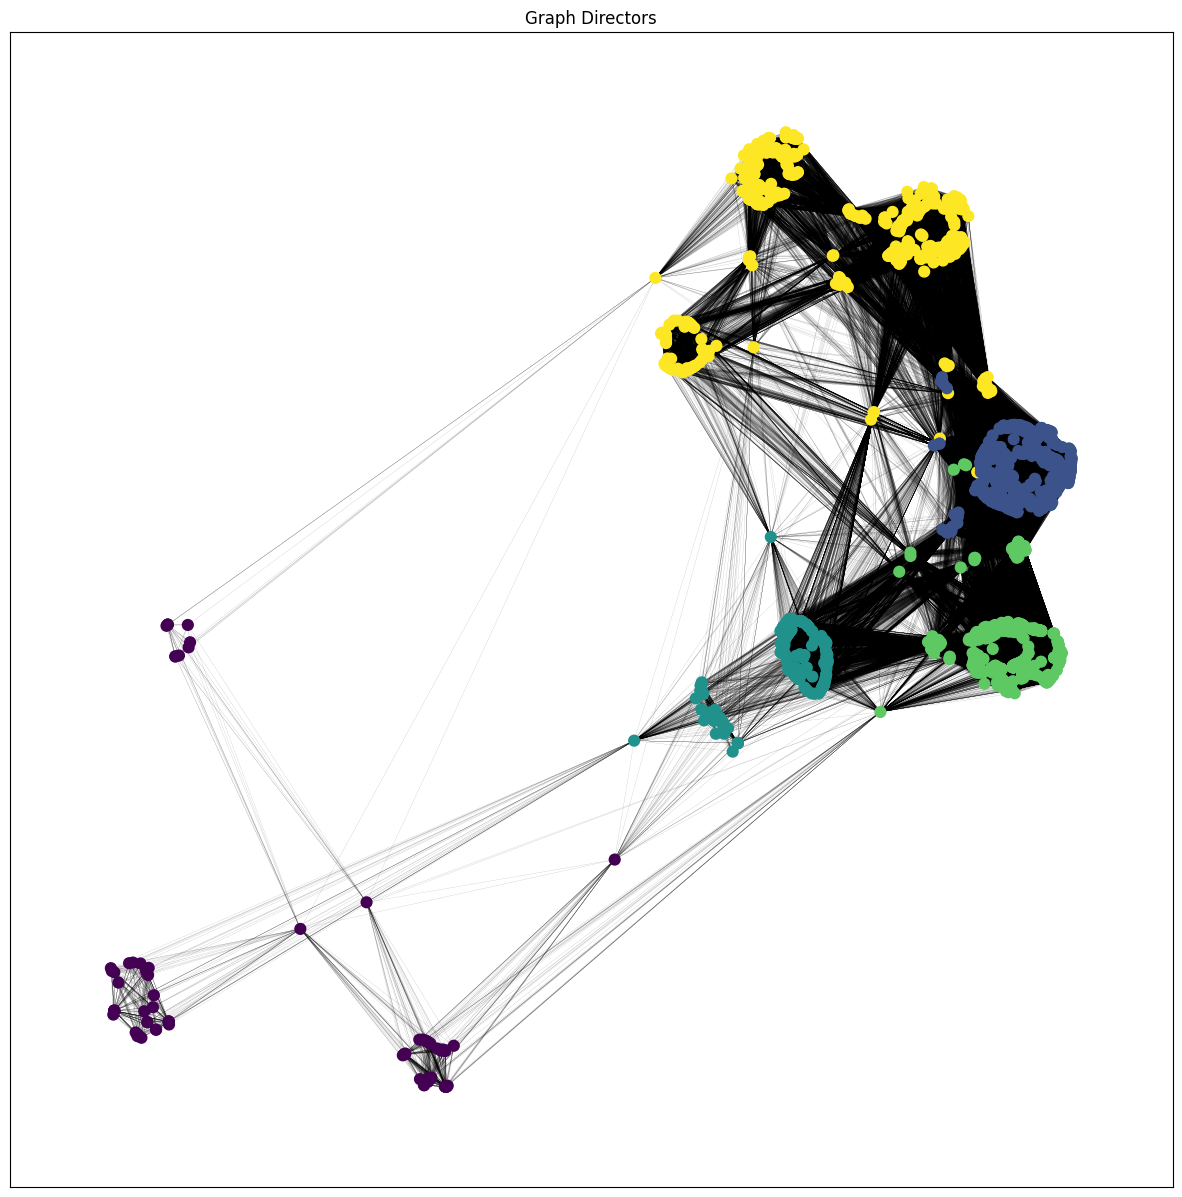

In [14]:
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=60, node_color=values)
nx.draw_networkx_edges(G, pos=pos, width=0.05)
plt.title("Graph Directors")
plt.show()

Text(0.5, 1.0, 'Community 1')

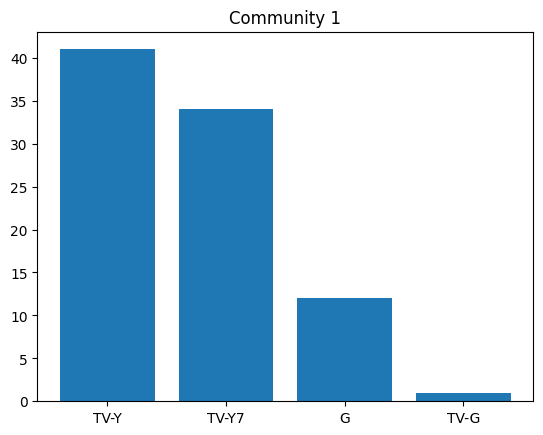

In [15]:
community_number = 0
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

TV-MA: Thể loại dành cho người lớn

Text(0.5, 1.0, 'Community 2')

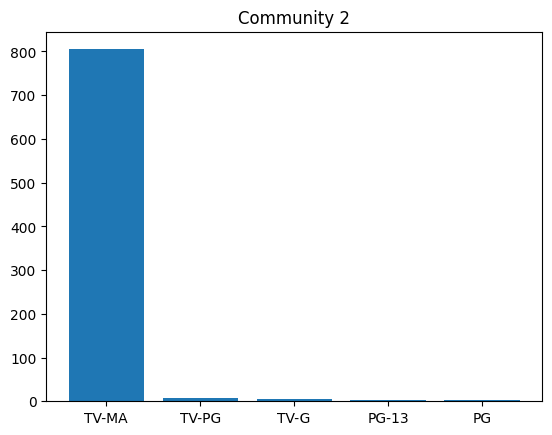

In [16]:
community_number = 1
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

TV-PG: Thể loại 

Text(0.5, 1.0, 'Community 3')

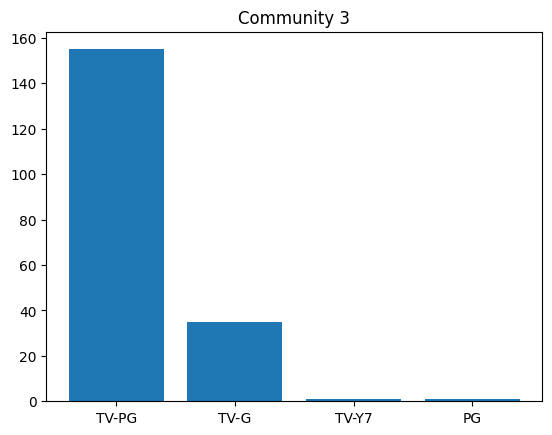

In [17]:
community_number = 2
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

TV-14: Thể loại dành cho trẻ từ 14 tuổi

Text(0.5, 1.0, 'Community 4')

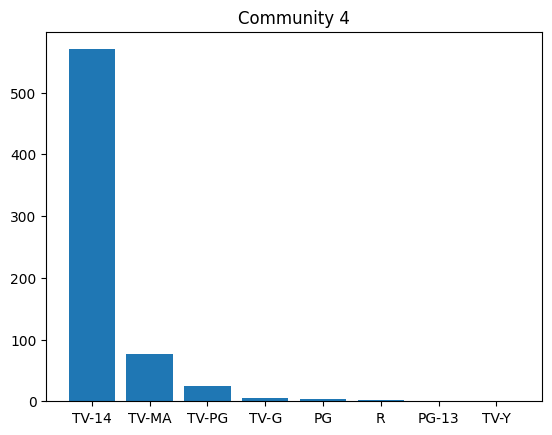

In [18]:
community_number = 3
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

TV-Y, TV-Y7: Thể loại dành cho trẻ nhỏ

Text(0.5, 1.0, 'Community 5')

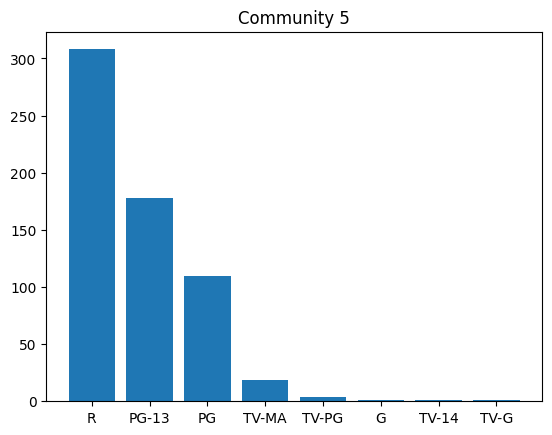

In [19]:
community_number = 4
l = []
for n, k in partition.items():
    if k == community_number:
        l.append(n)

community_data = pd.DataFrame([r['rating'] for i, r in data.iterrows() if r['director'] in l], columns=[
                              'rating'])['rating'].value_counts().rename_axis('rating').reset_index(name='counts')
plt.bar(community_data['rating'], community_data['counts'])
plt.title(f'Community {community_number + 1}')

R: Bạo lực, tệ nạn
PG-13: Thể loại phù hợp với trẻ từ 13 tuổi và có sự hướng dẫn của phụ huynh

In [20]:
# import networkx as nx
  
  
# def edge_to_remove(g):
      
#     d1 = nx.edge_betweenness_centrality(g)
#     list_of_tuples = list(d1.items())
      
#     sorted(list_of_tuples, key = lambda x:x[1], reverse = True)
      
#     # Will return in the form (a,b)
#     return list_of_tuples[0][0]
  
# def girvan(g):
#     a = nx.connected_components(g)
#     lena = len(list(a))
#     print (' The number of connected components are ', lena)
#     while (lena == 1):
  
#         # We need (a,b) instead of ((a,b))
#         u, v = edge_to_remove(g)
#         g.remove_edge(u, v) 
          
#         a = nx.connected_components(g)
#         lena=len(list(a))
#         print (' The number of connected components are ', lena)
#     return a


# a = girvan(G)
# print ('Barbell Graph')
  
# for i in a:
#     print (i.nodes())
#     print ('.............')